# Communities and Crime

## WADE El Hadji Malick

In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt    
import seaborn as sns

import math

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_decomposition import PLSRegression


from sklearn.metrics import median_absolute_error, mean_absolute_error,mean_squared_error, max_error, r2_score

from sklearn.externals import joblib # save and load models

# # save the model to disk
# filename = 'modeles/SVM'
# joblib.dump(SVM, filename)

# # load the model from disk
# loaded_model = joblib.load(filename)

## 1. Chargement et Nettoyage des données

#### a. Traitement des valeurs manquantes 

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# On affiche les informations sur les données
fichier = open("communities_names.txt", "r")
print(fichier.read())
fichier.close()

Title: Communities and Crime

Abstract: Communities within the United States. The data combines socio-economic data 
from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime 
data from the 1995 FBI UCR.

-----------------------------------------------------------------------------------------

Data Set Characteristics:  Multivariate
Attribute Characteristics: Real
Associated Tasks: Regression
Number of Instances: 1994
Number of Attributes: 128
Missing Values? Yes
Area: Social
Date Donated: 2009-07-13

-----------------------------------------------------------------------------------------

Source:

Creator: Michael Redmond (redmond 'at' lasalle.edu); Computer Science; La Salle 
University; Philadelphia, PA, 19141, USA
-- culled from 1990 US Census, 1995 US FBI Uniform Crime Report, 1990 US Law 
Enforcement Management and Administrative Statistics Survey, available from ICPSR at U 
of Michigan.
-- Donor: Michael Redmond (redmond 'at' lasalle.edu); Computer

In [3]:
# On récupére le nom des colonnes dans le fichier
Columns = []

with open("communities_columns.txt","r") as fichier:
    for ln in fichier:
        col = ln.split(" ")
        Columns.append(col[1])

In [4]:
Columns

['state',
 'county',
 'community',
 'communityname',
 'fold',
 'population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'P

In [5]:
path_Home = "communities_data.csv"
#path = "/users/mmath/wade/Bureau/Data/Statistique_en_grande_dimension"

df = pd.read_csv(path_Home,  sep=';',header=None)
df.columns = Columns
df.head(100)

,state,county,community,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,PctOccupManu,PctOccupMgmtProf,MalePctDivorce,MalePctNevMarr,FemalePctDiv,TotalPctDiv,PersPerFam,PctFam2Par,PctKids2Par,PctYoungKids2Par,PctTeen2Par,PctWorkMomYoungKids,PctWorkMom,NumIlleg,PctIlleg,NumImmig,PctImmigRecent,PctImmigRec5,PctImmigRec8,PctImmigRec10,PctRecentImmig,PctRecImmig5,PctRecImmig8,PctRecImmig10,PctSpeakEnglOnly,PctNotSpeakEnglWell,PctLargHouseFam,PctLargHouseOccup,PersPerOccupHous,PersPerOwnOccHous,PersPerRentOccHous,PctPersOwnOccup,PctPersDenseHous,PctHousLess3BR,MedNumBR,HousVacant,PctHousOccup,PctHousOwnOcc,PctVacantBoarded,PctVacMore6Mos,MedYrHousBuilt,PctHousNoPhone,PctWOFullPlumb,OwnOccLowQuart,OwnOccMedVal,OwnOccHiQuart,RentLowQ,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.00,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,0.25,0.52,0.68,0.40,0.75,0.75,0.35,0.55,0.59,0.61,0.56,0.74,0.76,0.04,0.14,0.03,0.24,0.27,0.37,0.39,0.07,0.07,0.08,0.08,0.89,0.06,0.14,0.13,0.33,0.39,0.28,0.55,0.09,0.51,0.5,0.21,0.71,0.52,0.05,0.26,0.65,0.14,0.06,0.22,0.19,0.18,0.36,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.03,0.13,0.96,0.17,0.06,0.18,0.44,0.13,0.94,0.93,0.03,0.07,0.1,0.07,0.02,0.57,0.29,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.00,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,0.42,0.36,1.00,0.63,0.91,1.00,0.29,0.43,0.47,0.60,0.39,0.46,0.53,0.00,0.24,0.01,0.52,0.62,0.64,0.63,0.25,0.27,0.25,0.23,0.84,0.10,0.16,0.10,0.17,0.29,0.17,0.26,0.20,0.82,0.0,0.02,0.79,0.24,0.02,0.25,0.65,0.16,0.00,0.21,0.20,0.21,0.42,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.00,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,0.49,0.32,0.63,0.41,0.71,0.70,0.45,0.42,0.44,0.43,0.43,0.71,0.67,0.01,0.46,0.00,0.07,0.06,0.15,0.19,0.02,0.02,0.04,0.05,0.88,0.04,0.20,0.20,0.46,0.52,0.43,0.42,0.15,0.51,0.5,0.01,0.86,0.41,0.29,0.30,0.52,0.47,0.45,0.18,0.17,0.16,0.27,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.00,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,0.37,0.39,0.34,0.45,0.49,0.44,0.75,0.65,0.54,0.83,0.65,0.85,0.86,0.03,0.33,0.02,0.11,0.20,0.30,0.31,0.05,0.08,0.11,0.11,0.81,0.08,0.56,0.62,0.85,0.77,1.00,0.94,0.12,0.01,0.5,0.01,0.97,0.96,0.60,0.47,0.52,0.11,0.11,0.24,0.21,0.19,0.75,0.70,0.77,0.89,0.63,0.51,0

In [6]:
print ("Lignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])
print("---------------")
print ("\nVariables:")
print(df.dtypes)
print ("\nValeurs uniques :")
print(df.nunique())
donnees = df.shape[0]*df.shape[1] # on mesure le nombre de données

Lignes:  1994
Colonnes:  128
---------------

Variables:
state                      int64
county                    object
community                 object
communityname             object
fold                       int64
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap       

In [7]:
#On remplace les ? par des NaN qui peuvent être facilement traités par les modéles
df = df.replace("?",np.nan)

In [8]:
print ("\nTotal des valeurs manquantes :  ",df.isnull().sum().values.sum())

print("\n")
print(df.isnull().sum())


Total des valeurs manquantes :   39202


state                       0
county                   1174
community                1177
communityname               0
fold                        0
population                  0
householdsize               0
racepctblack                0
racePctWhite                0
racePctAsian                0
racePctHisp                 0
agePct12t21                 0
agePct12t29                 0
agePct16t24                 0
agePct65up                  0
numbUrban                   0
pctUrban                    0
medIncome                   0
pctWWage                    0
pctWFarmSelf                0
pctWInvInc                  0
pctWSocSec                  0
pctWPubAsst                 0
pctWRetire                  0
medFamInc                   0
perCapInc                   0
whitePerCap                 0
blackPerCap                 0
indianPerCap                0
AsianPerCap                 0
OtherPerCap                 1
HispPerCap                  

In [9]:
# on récupére le nom des colonnes avec es valeurs manquantes sauf "OtherPerCap" qui n'en contient 1
Col_NaN = df.columns[df.isna().any()].tolist() 
Col_NaN.remove("OtherPerCap")

# On supprime toutes les colonnes avec des valeurs manquantes et la seule observation avec un valeur manquante de "OtherPerCap" 
df = df.drop(Col_NaN, 1)
df = df.dropna()

In [10]:
print ("\nTotal des valeurs manquantes :  ",df.isnull().sum().values.sum())

print("\n")
print(df.isnull().sum())


Total des valeurs manquantes :   0


state                    0
communityname            0
fold                     0
population               0
householdsize            0
racepctblack             0
racePctWhite             0
racePctAsian             0
racePctHisp              0
agePct12t21              0
agePct12t29              0
agePct16t24              0
agePct65up               0
numbUrban                0
pctUrban                 0
medIncome                0
pctWWage                 0
pctWFarmSelf             0
pctWInvInc               0
pctWSocSec               0
pctWPubAsst              0
pctWRetire               0
medFamInc                0
perCapInc                0
whitePerCap              0
blackPerCap              0
indianPerCap             0
AsianPerCap              0
OtherPerCap              0
HispPerCap               0
NumUnderPov              0
PctPopUnderPov           0
PctLess9thGrade          0
PctNotHSGrad             0
PctBSorMore              0
PctUnemployed    

#### b. traietement des variables non prédictives

In [11]:
# Les 5 premiéres variables sont non prédictives.
ColNonPredict = ["state", "county","community", "communityname", "fold"]

# Les variables ['county', 'community'] ont déja été supprimées avec les variables  NaN
ColNonPredict.remove('county')
ColNonPredict.remove('community')

# On supprime toutes les 3 colonnes
df = df.drop(ColNonPredict, 1)
df = df.dropna()

In [12]:
Perte_de_donnees = (donnees - df.shape[0]*df.shape[1])*100/donnees

print("En supprimant les valeurs manquantes et les variables non prédictives, on a une perte de données de ", round(Perte_de_donnees,1),"%")
print ("\nLignes: " ,df.shape[0])
print ("Colonnes: " ,df.shape[1])

En supprimant les valeurs manquantes et les variables non prédictives, on a une perte de données de  21.1 %

Lignes:  1993
Colonnes:  101


## 2. Modèles de prédiction

In [13]:
X = df[df.columns.tolist()[:-1]] # toutes les colonnes sauf "ViolentCrimesPerPop"

y = df[df.columns.tolist()[-1]] # colonne "ViolentCrimesPerPop"


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 40)

#### a. GradientBoosting

In [14]:
# #on crée un nouveau modèle gradient Boosting
# GB = GradientBoostingRegressor()

# #on crée un dictionnaire de toutes les valeurs que nous voulons tester
# param_grid_GB = {
#     "loss": ['ls', 'lad'],
#     "learning_rate": [0.005, 0.01, 0.05, 0.1],
#     "min_samples_leaf": [0.005, 0.02, 1],
#     "max_depth":[8, 10],
#     "max_features":["log2","sqrt", 100],
#     "criterion": ["friedman_mse","mae","mse"],
#     "subsample":[0.5, 0.75, 1.0],
#     "n_estimators":[200, 400, 600],
#     }

# #on utilise gridsearch pour tester toutes les valeurs de param_grid
# GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)

# #ajustement du modèle aux données
# t_debut = time.time()
# GB_gscv.fit(X_train,y_train)
# t_fin = time.time()

# temps_GB = (t_fin - t_debut)/60

# print(GB_gscv.best_params_)

In [15]:
# mse_error = mean_squared_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# mean_abs_error = mean_absolute_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# median_error = median_absolute_error(y_test, GB_gscv.best_estimator_.predict(X_test))
# max_error = max_error(y_test, GB_gscv.best_estimator_.predict(X_test))

# print("L’erreur quadratique moyenne: %.4f" % mse_error)
# print("L’erreur absolue moyenne: %.4f" % mean_abs_error)
# print("L’erreur maximun: %.4f" % max_error)
# print("Médiane de l'erreur absolue: %.4f" % median_error)
# print("--------")
# print("Moyenne: %.4f" %  y_test.mean())
# print("Mediane: %.4f" %  y_test.median())
# print("--------")

# #la valeur R au carré pour le train/essai.
# print("R-squared for Train: %.2f" %GB_gscv.score(X_train, y_train))
# print("R-squared for Test: %.2f" %GB_gscv.score(X_test, y_test))

In [16]:
# model = GB_gscv.best_estimator_
# #print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
# #plot graph of feature importances for better visualization
# feat_importances = pd.Series(model.feature_importances_, index=X.columns)
# feat_importances.nlargest(10).plot(kind='barh')
# plt.figtext(.5,.9,"Importance des variables", fontsize=12, ha='center')
# plt.show()

#### b. Autres modéles avec réduction de dimensions/ PLS

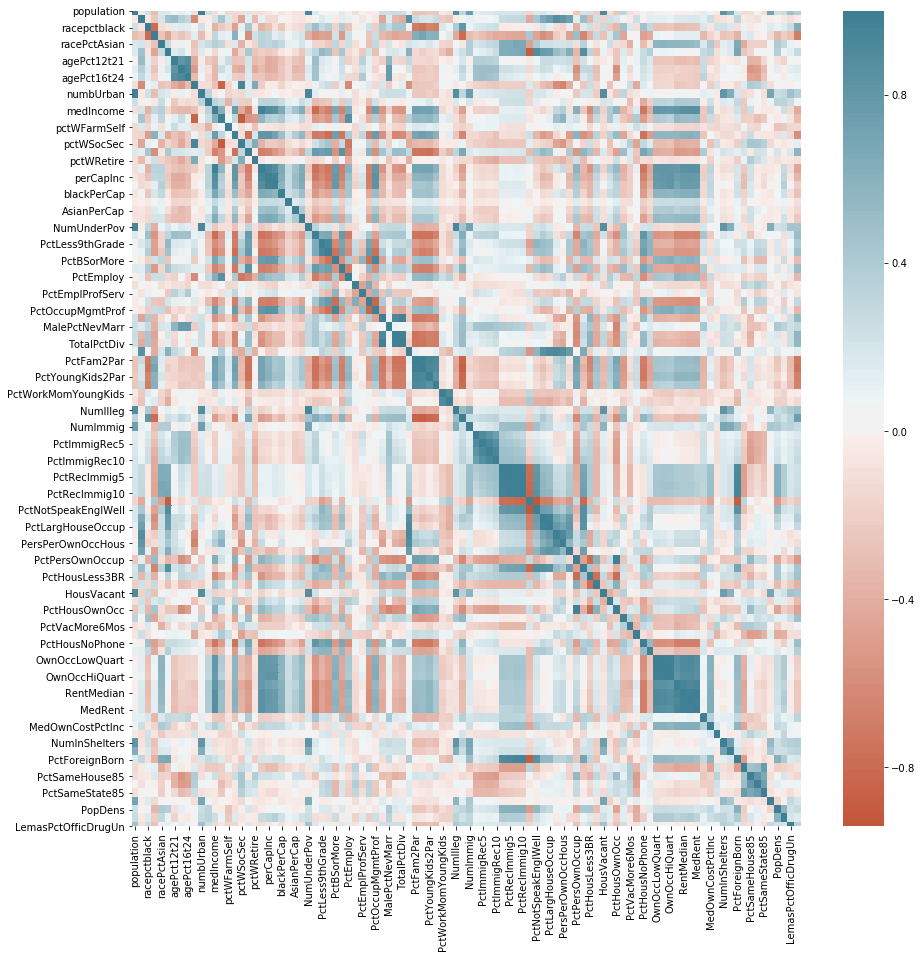

In [17]:
# On regarde la matrice de corrélation
fig = plt.figure(1, figsize=(15, 15))

sns.heatmap(round(df.corr(),2), cmap=sns.diverging_palette(20, 220, n=200), fmt=".2f")
plt.show()

In [18]:
def optimise_pls_cv(X, y, n_comp, plot_components=True):
    '''Run PLS including a variable number of components, up to n_comp,
       and calculate MSE '''
    mse = []
    component = np.arange(1, n_comp)
    for i in component:
        pls = PLSRegression(n_components=i)
        # Cross-validation
        y_cv = cross_val_predict(pls, X, y, cv=5)
        mse.append(mean_squared_error(y, y_cv))
        comp = 100*(i+1)/100
        # Trick to update status on the same line
        stdout.write("\r%d%% completed" % comp)
        stdout.flush()
    stdout.write("\n")
    # Calculate and print the position of minimum in MSE
    msemin = np.argmin(mse)
    print("Le meilleur nombre de composants: ", msemin+1)
    stdout.write("\n")
    if plot_components is True:
        with plt.style.context(('ggplot')):
            plt.plot(component, np.array(mse), '-v', color = 'blue', mfc='blue')
            plt.plot(component[msemin], np.array(mse)[msemin], 'P', ms=10, mfc='red')
            plt.xlabel('Nombre de composants du PLS')
            plt.ylabel('MSE')
            plt.title('PLS')
            plt.xlim(left=-1)
        plt.show()
    # Define PLS object with optimal number of components
    pls_opt = PLSRegression(n_components=msemin+1)
    # Fir to the entire dataset
    pls_opt.fit(X, y)
    y_c = pls_opt.predict(X)
    # Cross-validation
    y_cv = cross_val_predict(pls_opt, X, y, cv=5)
    # Calculate scores for calibration and cross-validation
    score_c = r2_score(y, y_c)
    score_cv = r2_score(y, y_cv)
    # Calculate mean squared error for calibration and cross validation
    mse_c = mean_squared_error(y, y_c)
    mse_cv = mean_squared_error(y, y_cv)
    print('R2 calib: %5.3f'  % score_c)
    print('R2 CV: %5.3f'  % score_cv)
    print('MSE calib: %5.3f' % mse_c)
    print('MSE CV: %5.3f' % mse_cv)
    # Plot regression and figures of merit
    rangey = max(y) - min(y)
    rangex = max(y_c) - min(y_c)
    # Fit a line to the CV vs response
    z = np.polyfit(y, y_c, 1)
    return

40% completed
Le meilleur nombre de composants:  20



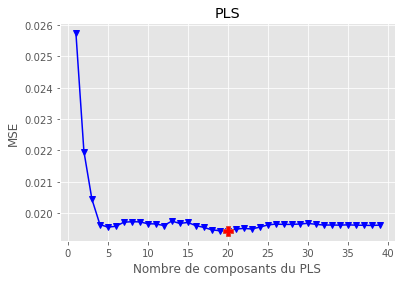

R2 calib: 0.691
R2 CV: 0.634
MSE calib: 0.016
MSE CV: 0.019


In [19]:
from sklearn.model_selection import cross_val_predict
from sys import stdout

optimise_pls_cv(X_train,y_train, 40, plot_components=True)

In [20]:
pls = PLSRegression(n_components=20)
pls.fit(X_train,y_train)

PLSRegression(copy=True, max_iter=500, n_components=20, scale=True, tol=1e-06)

In [21]:
mse_error = mean_squared_error(y_test, pls.predict(X_test))
mean_abs_error = mean_absolute_error(y_test, pls.predict(X_test))
median_error = median_absolute_error(y_test, pls.predict(X_test))
#max_error = max_error(y_test, pls.predict(X_test))

print("L’erreur quadratique moyenne: %.4f" % mse_error)
print("L’erreur absolue moyenne: %.4f" % mean_abs_error)
#print("L’erreur maximun: %.4f" % max_error)
print("Médiane de l'erreur absolue: %.4f" % median_error)
print("--------")
print("Moyenne: %.4f" %  y_test.mean())
print("Mediane: %.4f" %  y_test.median())
print("--------")

#la valeur R au carré pour le train/essai.
print("R-squared for Train: %.2f" %pls.score(X_train, y_train))
print("R-squared for Test: %.2f" %pls.score(X_test, y_test))

L’erreur quadratique moyenne: 0.0182
L’erreur absolue moyenne: 0.0967
Médiane de l'erreur absolue: 0.0686
--------
Moyenne: 0.2510
Mediane: 0.1600
--------
R-squared for Train: 0.69
R-squared for Test: 0.68


In [22]:
pls.transform(X_train).shape

(1395, 20)

In [25]:
#on crée un nouveau modèle gradient Boosting
GB = GradientBoostingRegressor()

#on crée un dictionnaire de toutes les valeurs que nous voulons tester
param_grid_GB = {
    "loss": ['ls', 'lad'],
    "learning_rate": [0.005, 0.01, 0.05, 0.1],
#     "min_samples_leaf": [0.005, 0.02, 1],
    "max_depth":[5,8],
    "max_features":["log2","sqrt", 20],
#     "criterion": ["friedman_mse","mae"],
    "subsample":[0.5, 0.75, 1.0],
    "n_estimators":[50, 100, 200],
    }

#on utilise gridsearch pour tester toutes les valeurs de param_grid
GB_gscv = GridSearchCV(GB, param_grid_GB, cv=5, n_jobs=-1, verbose=10)

#ajustement du modèle aux données
t_debut = time.time()
GB_gscv.fit(pls.transform(X_train),y_train)
t_fin = time.time()

temps_GB = (t_fin - t_debut)/60

print(GB_gscv.best_params_)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  31 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  51 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1997s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  62 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.2040s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 159 tasks      | elapsed:    9.7s
[Parallel(n_jo

{'learning_rate': 0.05, 'loss': 'lad', 'max_depth': 5, 'max_features': 20, 'n_estimators': 200, 'subsample': 0.75}


In [26]:
mse_error = mean_squared_error(y_test, GB_gscv.best_estimator_.predict(pls.transform(X_test)))
mean_abs_error = mean_absolute_error(y_test, GB_gscv.best_estimator_.predict(pls.transform(X_test)))
median_error = median_absolute_error(y_test, GB_gscv.best_estimator_.predict(pls.transform(X_test)))
max_error = max_error(y_test, GB_gscv.best_estimator_.predict(pls.transform(X_test)))

print("L’erreur quadratique moyenne: %.4f" % mse_error)
print("L’erreur absolue moyenne: %.4f" % mean_abs_error)
print("L’erreur maximun: %.4f" % max_error)
print("Médiane de l'erreur absolue: %.4f" % median_error)
print("--------")
print("Moyenne: %.4f" %  y_test.mean())
print("Mediane: %.4f" %  y_test.median())
print("--------")

#la valeur R au carré pour le train/essai.
print("R-squared for Train: %.2f" %GB_gscv.score(pls.transform(X_train), y_train))
print("R-squared for Test: %.2f" %GB_gscv.score(pls.transform(X_test), y_test))

L’erreur quadratique moyenne: 0.0208
L’erreur absolue moyenne: 0.0961
L’erreur maximun: 0.7781
Médiane de l'erreur absolue: 0.0585
--------
Moyenne: 0.2510
Mediane: 0.1600
--------
R-squared for Train: 0.81
R-squared for Test: 0.63
